In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)
print("Sample1 mean and std: {}, {}\nSample2 mean and std: {}, {}".format(sample1.mean(), sample1.std(), sample2.mean(), sample2.std()))

Sample1 mean and std: 1.67, 1.288836684766538
Sample2 mean and std: 5.16, 1.521315220458929


In [56]:
def sample(n):
    sample1 = np.random.choice(pop1, n, replace=True)
    sample2 = np.random.choice(pop2, n, replace=True)
    print("Sample1 mean and std: {}, {}\nSample2 mean and std: {}, {}".format(sample1.mean(), sample1.std(), sample2.mean(), sample2.std()))
    
    plt.subplot(121)
    plt.hist(sample1)
    plt.subplot(122)
    plt.hist(sample2)

Sample1 mean and std: 1.983, 1.2151999835418037
Sample2 mean and std: 4.926, 1.606400946214861


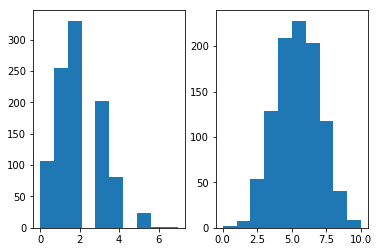

In [57]:
sample(1000)

Sample1 mean and std: 2.45, 1.16081867662439
Sample2 mean and std: 5.2, 0.9797958971132712


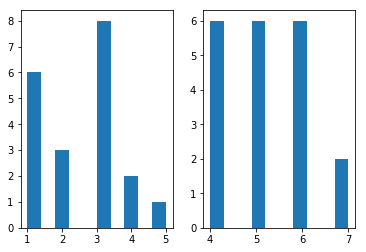

In [58]:
sample(20)

Increasing the sample size is likely to return a more accurate representation of the population. The histograms seem to more accurately represent what we can expect from the population. The means and standard deviations are not far off - they are more similar to the population than the smaller samples.

Conversely, decreasing the sample size is likely to be less like the population. Population1 is probably a right-skew, as it can take on no negative values and should have a mean of about 2. Its small sample is likely lacking too much information to be a good representation. The same can be said for the second small sample.

In [59]:
from scipy.stats import ttest_ind
pop1_1 = np.random.binomial(10, 0.3, 10000)
pop1_2 = np.random.binomial(10, 0.4, 10000)
sample1_1 = np.random.choice(pop1_1, 100, replace=True)
sample1_2 = np.random.choice(pop1_2, 100, replace=True)

ttest_ind(sample1_1, sample2, equal_var=False)

Ttest_indResult(statistic=-10.699398843509192, pvalue=2.242990027028604e-21)

In [60]:
ttest_ind(sample1_2, sample2, equal_var=False)

Ttest_indResult(statistic=-5.986483628826966, pvalue=9.987573737618132e-09)

It appears that the t-value approaches zero as the samples become more similar (closer means, standard deviations). The p-value seems to be increasing. The p-value maximum is 1, which might be what it's approaching. This might only occur if the samples match or have some perfect correlation - not sure.

In [71]:
chi = np.random.chisquare(10, 10000)
chi_sample = np.random.choice(chi, 100, replace=True)

Text(0.5,1,'Chi population')

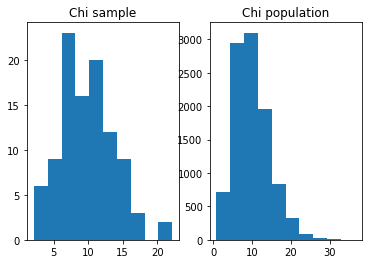

In [74]:
plt.subplot(121)
plt.hist(chi_sample)
plt.title('Chi sample')
plt.subplot(122)
plt.hist(chi)
plt.title('Chi population')

In [75]:
print('Population mean: {}\nSample mean: {}'.format(chi.mean(), chi_sample.mean()))

Population mean: 10.031738435126202
Sample mean: 9.9717029838748


The sampling of this distribution seemed to do a pretty decent job of representing the population with only 100 samples.